### Цель лабораторной работы: 
изучение способов предварительной обработки данных для дальнейшего формирования моделей.
### Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполне
ния следующих пунктов можно использовать несколько различных наборов данных (один для обработки пр
опусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
# Набор 1
data = pd.read_csv('googleplaystore.csv', sep=",")
# Набор 2
data1 = pd.read_csv('googleplaystore_user_reviews.csv', sep=",")

In [0]:
# Набор 1
data.shape

(10841, 13)

In [0]:
# Набор 2
data1.shape

(64295, 5)

In [0]:
# Набор 1
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
# Набор 2
data1.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [0]:
# пропуски в наборе 1
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
# пропуски в наборе 2
data1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [0]:
# Набор 1
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Набор 2
data1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [0]:

total_count = data.shape[0]
print('Строки в наборе 1: {}'.format(total_count))

Строки в наборе 1: 10841


In [0]:
total_count1 = data1.shape[0]
print('Строки в наборе 2: {}'.format(total_count1))

Строки в наборе 2: 64295


## Обработка пропусков

In [0]:
# Удаление колонок, содержащих пустые значения в наборе 1
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [0]:
# Удаление колонок, содержащих пустые значения в наборе 2
data_new_11 = data1.dropna(axis=1, how='any')
(data1.shape, data_new_11.shape)

((64295, 5), (64295, 1))

In [0]:
# Удаление строк, содержащих пустые значения в наборе 1
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [0]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Удаление строк, содержащих пустые значения в наборе 2
data_new_21 = data1.dropna(axis=0, how='any')
(data1.shape, data_new_21.shape)

((64295, 5), (37427, 5))

In [0]:
data1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [0]:
# Заполнение всех пропущенных значений нулями в наборе 1
data_new_3 = data.fillna(0)
data_new_3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Заполнение всех пропущенных значений нулями в наборе 1
data_new_31 = data1.fillna(0)
data_new_31.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,0,0,0.00,0.000000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Импьютация

### Числовые данные

In [0]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета набора 1
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [0]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета набора 2
num_cols1 = []
for col in data1.columns:
    # Количество пустых значений 
    temp_null_count1 = data1[data1[col].isnull()].shape[0]
    dt1 = str(data1[col].dtype)
    if temp_null_count1>0 and (dt1=='float64' or dt1=='int64'):
        num_cols1.append(col)
        temp_perc1 = round((temp_null_count1 / total_count1) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt1, temp_null_count1, temp_perc1))

Колонка Sentiment_Polarity. Тип данных float64. Количество пустых значений 26863, 41.78%.
Колонка Sentiment_Subjectivity. Тип данных float64. Количество пустых значений 26863, 41.78%.


In [0]:
# Фильтр по колонкам с пропущенными значениями  набора 1
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [0]:
# Фильтр по колонкам с пропущенными значениями  набора 2
data_num1 = data1[num_cols1]
data_num1

,Sentiment_Polarity,Sentiment_Subjectivity
0,1.00,0.533333
1,0.25,0.288462
2,NaN,NaN
3,0.40,0.875000
4,1.00,0.300000
...,...,...
64290,NaN,NaN
64291,NaN,NaN
64292,NaN,NaN
64293,NaN,NaN


/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


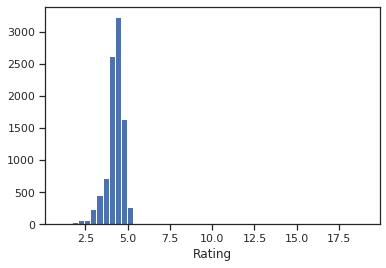

In [0]:
# Гистограмма по признакам  набора 1 - Rating
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


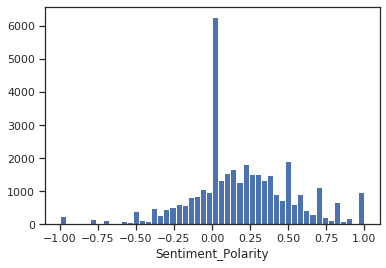

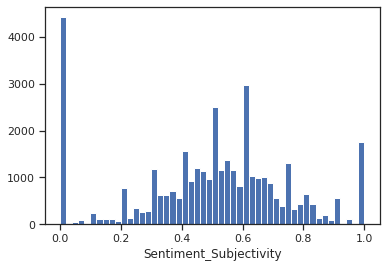

In [0]:
# Гистограмма по признакам  набора 1: Sentiment_Polarity, Sentiment_subjectivity
for col in data_num1:
    plt.hist(data1[col], 50)
    plt.xlabel(col)
    plt.show()

In [0]:
# Фильтр по пустым значениям поля Rating 
data[data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [0]:
# Фильтр по пустым значениям поля Sentiment_Polarity 
data1[data1['Sentiment_Polarity'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [0]:
# Фильтр по пустым значениям поля Sentiment_Subjectivity 
data1[data1['Sentiment_Subjectivity'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [0]:
# Запоминаем индексы строк с пустыми значениями  поля Rating 
flt_index = data[data['Rating'].isnull()].index
flt_index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [0]:
# Запоминаем индексы строк с пустыми значениями поля Sentiment_Polarity
flt_index1 = data1[data1['Sentiment_Polarity'].isnull()].index
flt_index1

Int64Index([    2,     7,    15,   102,   107,   115,   362,   368,   405,
              407,
            ...
            64285, 64286, 64287, 64288, 64289, 64290, 64291, 64292, 64293,
            64294],
           dtype='int64', length=26863)

In [0]:
# Запоминаем индексы строк с пустыми значениями поляSentiment_Subjectivity
flt_index11 = data1[data1['Sentiment_Subjectivity'].isnull()].index
flt_index11

Int64Index([    2,     7,    15,   102,   107,   115,   362,   368,   405,
              407,
            ...
            64285, 64286, 64287, 64288, 64289, 64290, 64291, 64292, 64293,
            64294],
           dtype='int64', length=26863)

In [0]:
# Проверяем что выводятся нужные строки Rating
data[data.index.isin(flt_index)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [0]:
# Проверяем что выводятся нужные строки Sentiment_Polarity
data1[data1.index.isin(flt_index1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [0]:
# Проверяем что выводятся нужные строки Sentiment_Subjectivity
data1[data1.index.isin(flt_index11)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [0]:
# фильтр по колонке Rating
data_num[data_num.index.isin(flt_index)]['Rating']

23      NaN
113     NaN
123     NaN
126     NaN
129     NaN
         ..
10824   NaN
10825   NaN
10831   NaN
10835   NaN
10838   NaN
Name: Rating, Length: 1474, dtype: float64

In [0]:
# фильтр по колонке Sentiment_Polarity
data_num1[data_num1.index.isin(flt_index1)]['Sentiment_Polarity']

2       NaN
7       NaN
15      NaN
102     NaN
107     NaN
         ..
64290   NaN
64291   NaN
64292   NaN
64293   NaN
64294   NaN
Name: Sentiment_Polarity, Length: 26863, dtype: float64

In [0]:
# фильтр по колонке Sentiment_Subjectivity
data_num1[data_num1.index.isin(flt_index1)]['Sentiment_Subjectivity']

2       NaN
7       NaN
15      NaN
102     NaN
107     NaN
         ..
64290   NaN
64291   NaN
64292   NaN
64293   NaN
64294   NaN
Name: Sentiment_Subjectivity, Length: 26863, dtype: float64

In [0]:
data_num_Rating = data_num[['Rating']]
data_num_Rating.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [0]:
data_num_SPol = data_num1[['Sentiment_Polarity']]
data_num_SPol.head()

,Sentiment_Polarity
0,1.00
1,0.25
2,NaN
3,0.40
4,1.00


In [0]:
data_num_SSub = data_num1[['Sentiment_Subjectivity']]
data_num_SSub.head()

,Sentiment_Subjectivity
0,0.533333
1,0.288462
2,NaN
3,0.875000
4,0.300000


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [0]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [0]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only1 = indicator.fit_transform(data_num_SPol)
mask_missing_values_only1

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [0]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only11 = indicator.fit_transform(data_num_SSub)
mask_missing_values_only11

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
# Rating
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Rating)
    return data_num_imp[mask_missing_values_only]

In [0]:
# Sentiment_Polarity
def test_num_impute1(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_SPol)
    return data_num_imp[mask_missing_values_only1]

In [0]:
# Sentiment_Subjectivity
def test_num_impute11(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_SSub)
    return data_num_imp[mask_missing_values_only11]

In [0]:
strategies[0], test_num_impute(strategies[0])


('mean',
 array([4.19333832, 4.19333832, 4.19333832, ..., 4.19333832, 4.19333832,
        4.19333832]))

In [0]:
strategies[0], test_num_impute1(strategies[0])

('mean',
 array([0.18214631, 0.18214631, 0.18214631, ..., 0.18214631, 0.18214631,
        0.18214631]))

In [0]:
# Sentiment_Subjectivity
strategies[0], test_num_impute11(strategies[0])

('mean',
 array([0.49270393, 0.49270393, 0.49270393, ..., 0.49270393, 0.49270393,
        0.49270393]))

In [0]:
strategies[1], test_num_impute(strategies[1])

('median', array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3]))

In [0]:
strategies[1], test_num_impute1(strategies[1])

('median', array([0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15]))

In [0]:
# Sentiment_Subjectivity
strategies[1], test_num_impute11(strategies[1])

('median',
 array([0.51428571, 0.51428571, 0.51428571, ..., 0.51428571, 0.51428571,
        0.51428571]))

In [0]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([4.4, 4.4, 4.4, ..., 4.4, 4.4, 4.4]))

In [0]:
strategies[2], test_num_impute1(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

In [0]:
# Sentiment_Subjectivity
strategies[2], test_num_impute11(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col1(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only1]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [0]:
# Sentiment_Subjectivity
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col11(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only11]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [0]:
data[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [0]:
data1[['Sentiment_Polarity']].describe()

,Sentiment_Polarity
count,37432.000000
mean,0.182146
std,0.351301
min,-1.000000
25%,0.000000
50%,0.150000
75%,0.400000
max,1.000000


In [0]:
data1[['Sentiment_Subjectivity']].describe()

,Sentiment_Subjectivity
count,37432.000000
mean,0.492704
std,0.259949
min,0.000000
25%,0.357143
50%,0.514286
75%,0.650000
max,1.000000


In [0]:
test_num_impute_col(data, 'Rating', strategies[0])

('Rating', 'mean', 1474, 4.193338315362443, 4.193338315362443)

In [0]:
test_num_impute_col1(data1, 'Sentiment_Polarity', strategies[0])

('Sentiment_Polarity', 'mean', 26863, 0.18214631382977464, 0.18214631382977464)

In [0]:
test_num_impute_col11(data1, 'Sentiment_Subjectivity', strategies[0])

('Sentiment_Subjectivity',
 'mean',
 26863,
 0.49270392839557814,
 0.49270392839557814)

In [0]:
test_num_impute_col(data, 'Rating', strategies[1])

('Rating', 'median', 1474, 4.3, 4.3)

In [0]:
test_num_impute_col1(data1, 'Sentiment_Polarity', strategies[1])

('Sentiment_Polarity', 'median', 26863, 0.15, 0.15)

In [0]:
test_num_impute_col1(data1, 'Sentiment_Subjectivity', strategies[2])

('Sentiment_Subjectivity', 'most_frequent', 26863, 0.0, 0.0)

In [0]:
test_num_impute_col(data, 'Rating', strategies[2])

('Rating', 'most_frequent', 1474, 4.4, 4.4)

In [0]:
test_num_impute_col1(data1, 'Sentiment_Polarity', strategies[2])

('Sentiment_Polarity', 'most_frequent', 26863, 0.0, 0.0)

In [0]:
test_num_impute_col1(data1, 'Sentiment_Subjectivity', strategies[2])

('Sentiment_Subjectivity', 'most_frequent', 26863, 0.0, 0.0)

## Обработка пропусков в категориальных данных

In [0]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
data5 = pd.read_csv('covid_19_data.csv', sep=",")
total_count5 = data5.shape[0]
cat_cols5 = []
for col in data5.columns:
    # Количество пустых значений 
    temp_null_count5 = data5[data5[col].isnull()].shape[0]
    dt5 = str(data5[col].dtype)
    if temp_null_count5>0 and (dt5=='object'):
        cat_cols5.append(col)
        temp_perc5 = round((temp_null_count5 / total_count5) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt5, temp_null_count5, temp_perc5))

Колонка Province/State. Тип данных object. Количество пустых значений 1815, 36.78%.


In [0]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета

cat_cols1 = []
for col in data1.columns:
    # Количество пустых значений 
    temp_null_count1 = data1[data1[col].isnull()].shape[0]
    dt1 = str(data1[col].dtype)
    if temp_null_count1>0 and (dt1=='object'):
        cat_cols1.append(col)
        temp_perc1 = round((temp_null_count1 / total_count1) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt1, temp_null_count1, temp_perc1))

Колонка Translated_Review. Тип данных object. Количество пустых значений 26868, 41.79%.
Колонка Sentiment. Тип данных object. Количество пустых значений 26863, 41.78%.


In [0]:
cat_temp_data = data5[['Province/State']]
cat_temp_data.head()

,Province/State
0,Anhui
1,Beijing
2,Chongqing
3,Fujian
4,Gansu


In [0]:
cat_temp_data1 = data1[['Translated_Review']]
cat_temp_data1.head()

,Translated_Review
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
2,NaN
3,Works great especially going grocery store
4,Best idea us


In [0]:
cat_temp_data11 = data1[['Sentiment']]
cat_temp_data11.head()

,Sentiment
0,Positive
1,Positive
2,NaN
3,Positive
4,Positive


In [0]:
cat_temp_data['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [0]:
cat_temp_data1['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [0]:
cat_temp_data11['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [0]:
cat_temp_data[cat_temp_data['Province/State'].isnull()].shape

(1815, 1)

In [0]:
cat_temp_data1[cat_temp_data1['Translated_Review'].isnull()].shape

(26868, 1)

In [0]:
cat_temp_data11[cat_temp_data11['Sentiment'].isnull()].shape

(26863, 1)

In [0]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Anhui'],
       ['Beijing'],
       ['Chongqing'],
       ...,
       ['West Virginia'],
       ['Wyoming'],
       ['Gansu']], dtype=object)

In [0]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp21 = imp2.fit_transform(cat_temp_data1)
data_imp21

In [0]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp211 = imp2.fit_transform(cat_temp_data11)
data_imp211

array([['Positive'],
       ['Positive'],
       ['Positive'],
       ...,
       ['Positive'],
       ['Positive'],
       ['Positive']], dtype=object)

In [0]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array([' Montreal, QC', ' Norfolk County, MA', 'Alameda County, CA',
       'Alaska', 'Alberta', 'Anhui', 'Arizona', 'Arkansas', 'Ashland, NE',
       'Bavaria', 'Beijing', 'Bennington County, VT', 'Bergen County, NJ',
       'Berkeley, CA', 'Berkshire County, MA', 'Boston, MA',
       'British Columbia', 'Broward County, FL', 'Calgary, Alberta',
       'California', 'Carver County, MN', 'Channel Islands',
       'Charleston County, SC', 'Charlotte County, FL',
       'Chatham County, NC', 'Cherokee County, GA', 'Chicago',
       'Chicago, IL', 'Chongqing', 'Clark County, NV', 'Clark County, WA',
       'Cobb County, GA', 'Collin County, TX', 'Colorado', 'Connecticut',
       'Contra Costa County, CA', 'Cook County, IL', 'Cruise Ship',
       'Davidson County, TN', 'Davis County, UT', 'Delaware',
       'Delaware County, PA', 'Denmark', 'Denver County, CO',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Douglas County, CO', 'Douglas County, NE', 'Douglas County,

In [0]:
# Пустые значения отсутствуют
np.unique(data_imp21)

array(['!!!Dont waste time! Failed Samsung flagship phone galaxy s8, Installed ,shows rotating circle internet download, keeps rotates forever proper progress indication; finally shows failed download. Stupid game developers. Go NFS working good.',
       '"...Future Follow updated follow"...',
       '"An error occurred while loading the search results. Please try again." And so it\'s already 2 days. The reinstallation did not help',
       ..., '♡ Amazon',
       '❤❤ sometimes hands typing is not convenient to use, except this update on a version 10.19 a nice keyboard hands-on',
       '搵楼租楼 A lot of time, a lot of time management, easy to take care of'],
      dtype=object)

In [0]:
# Пустые значения отсутствуют
np.unique(data_imp211)

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [0]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Anhui'],
       ['Beijing'],
       ['Chongqing'],
       ...,
       ['West Virginia'],
       ['Wyoming'],
       ['!!!']], dtype=object)

In [0]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp31 = imp3.fit_transform(cat_temp_data1)
data_imp31

array([['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'],
       ['This help eating healthy exercise regular basis'],
       ['!!!'],
       ...,
       ['!!!'],
       ['!!!'],
       ['!!!']], dtype=object)

In [0]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp311 = imp3.fit_transform(cat_temp_data11)
data_imp311

array([['Positive'],
       ['Positive'],
       ['!!!'],
       ...,
       ['!!!'],
       ['!!!'],
       ['!!!']], dtype=object)

In [0]:
np.unique(data_imp3)

array([' Montreal, QC', ' Norfolk County, MA', '!!!',
       'Alameda County, CA', 'Alaska', 'Alberta', 'Anhui', 'Arizona',
       'Arkansas', 'Ashland, NE', 'Bavaria', 'Beijing',
       'Bennington County, VT', 'Bergen County, NJ', 'Berkeley, CA',
       'Berkshire County, MA', 'Boston, MA', 'British Columbia',
       'Broward County, FL', 'Calgary, Alberta', 'California',
       'Carver County, MN', 'Channel Islands', 'Charleston County, SC',
       'Charlotte County, FL', 'Chatham County, NC',
       'Cherokee County, GA', 'Chicago', 'Chicago, IL', 'Chongqing',
       'Clark County, NV', 'Clark County, WA', 'Cobb County, GA',
       'Collin County, TX', 'Colorado', 'Connecticut',
       'Contra Costa County, CA', 'Cook County, IL', 'Cruise Ship',
       'Davidson County, TN', 'Davis County, UT', 'Delaware',
       'Delaware County, PA', 'Denmark', 'Denver County, CO',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Douglas County, CO', 'Douglas County, NE', 'D

In [0]:
np.unique(data_imp31)

array(['!!!',
       '!!!Dont waste time! Failed Samsung flagship phone galaxy s8, Installed ,shows rotating circle internet download, keeps rotates forever proper progress indication; finally shows failed download. Stupid game developers. Go NFS working good.',
       '"...Future Follow updated follow"...', ..., '♡ Amazon',
       '❤❤ sometimes hands typing is not convenient to use, except this update on a version 10.19 a nice keyboard hands-on',
       '搵楼租楼 A lot of time, a lot of time management, easy to take care of'],
      dtype=object)

In [0]:
np.unique(data_imp311)

array(['!!!', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [0]:
data_imp3[data_imp3=='!!!'].size

1815

In [0]:
data_imp31[data_imp31=='!!!'].size

26868

In [0]:
data_imp311[data_imp311=='!!!'].size

26863

In [0]:
data5.shape


(4935, 8)

In [0]:
data1.shape


(64295, 5)

## Преобразование категориальных признаков в числовые

In [0]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Anhui
1,Beijing
2,Chongqing
3,Fujian
4,Gansu
...,...
4930,Mississippi
4931,North Dakota
4932,West Virginia
4933,Wyoming


In [0]:
cat_enc1 = pd.DataFrame({'c1':data_imp21.T[0]})
cat_enc1

,c1
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
2,Good
3,Works great especially going grocery store
4,Best idea us
...,...
64290,Good
64291,Good
64292,Good
64293,Good


In [0]:
cat_enc11 = pd.DataFrame({'c1':data_imp211.T[0]})
cat_enc11

,c1
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
64290,Positive
64291,Positive
64292,Positive
64293,Positive


## Кодирование категорий целочисленными значениями 

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [0]:
le1 = LabelEncoder()
cat_enc_le1 = le1.fit_transform(cat_enc1['c1'])

In [0]:
le11 = LabelEncoder()
cat_enc_le11 = le11.fit_transform(cat_enc11['c1'])

In [0]:
cat_enc['c1'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt Coun

In [0]:
cat_enc1['c1'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', 'Good', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [0]:
cat_enc11['c1'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [0]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [0]:
np.unique(cat_enc_le1)

array([    0,     1,     2, ..., 27991, 27992, 27993])

In [0]:
np.unique(cat_enc_le11)

array([0, 1, 2])

In [0]:
le.inverse_transform([0, 1, 2])

array([' Montreal, QC', ' Norfolk County, MA', 'Alameda County, CA'],
      dtype=object)

In [0]:
le1.inverse_transform([0, 1, 2])

array(['!!!Dont waste time! Failed Samsung flagship phone galaxy s8, Installed ,shows rotating circle internet download, keeps rotates forever proper progress indication; finally shows failed download. Stupid game developers. Go NFS working good.',
       '"...Future Follow updated follow"...',
       '"An error occurred while loading the search results. Please try again." And so it\'s already 2 days. The reinstallation did not help'],
      dtype=object)

In [0]:
le11.inverse_transform([0, 1, 2])

array(['Negative', 'Neutral', 'Positive'], dtype=object)

## Кодирование категорий наборами бинарных значений

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [0]:
ohe1 = OneHotEncoder()
cat_enc_ohe1 = ohe1.fit_transform(cat_enc1[['c1']])

In [0]:
ohe11 = OneHotEncoder()
cat_enc_ohe11 = ohe11.fit_transform(cat_enc11[['c1']])

In [0]:
cat_enc.shape

(4935, 1)

In [0]:
cat_enc1.shape

(64295, 1)

In [0]:
cat_enc11.shape

(64295, 1)

In [0]:
cat_enc_ohe.shape

(4935, 251)

In [0]:
cat_enc_ohe1.shape

(64295, 27994)

In [0]:
cat_enc_ohe11.shape

(64295, 3)

In [0]:
cat_enc_ohe

<4935x251 sparse matrix of type '<class 'numpy.float64'>'
	with 4935 stored elements in Compressed Sparse Row format>

In [0]:
cat_enc_ohe1

<64295x27994 sparse matrix of type '<class 'numpy.float64'>'
	with 64295 stored elements in Compressed Sparse Row format>

In [0]:
cat_enc_ohe1


<64295x27994 sparse matrix of type '<class 'numpy.float64'>'
	with 64295 stored elements in Compressed Sparse Row format>

In [0]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cat_enc_ohe1[:45000].todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cat_enc_ohe11[:45000].todense()[0:10]

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [0]:
cat_enc.head(10)

,c1
0,Anhui
1,Beijing
2,Chongqing
3,Fujian
4,Gansu
5,Guangdong
6,Guangxi
7,Guizhou
8,Hainan
9,Hebei


In [0]:
cat_enc1.head(10)

,c1
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
2,Good
3,Works great especially going grocery store
4,Best idea us
5,Best way
6,Amazing
7,Good
8,"Looking forward app,"
9,It helpful site ! It help foods get !


In [0]:
cat_enc11.head(10)

,c1
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
5,Positive
6,Positive
7,Positive
8,Neutral
9,Neutral


## Масштабирование данных

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax

In [0]:
# data = pd.read_csv('googleplaystore.csv', sep=",")
strategies[0], test_num_impute(strategies[0])
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

In [0]:
strategies[0], test_num_impute1(strategies[0])
sc11 = MinMaxScaler()
sc1_data1 = sc11.fit_transform(data1[['Sentiment_Polarity']])

In [0]:
strategies[0], test_num_impute1(strategies[0])
sc111 = MinMaxScaler()
sc1_data11 = sc111.fit_transform(data1[['Sentiment_Subjectivity']])

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


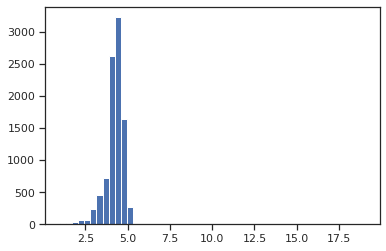

In [0]:
plt.hist(data['Rating'], 50)
plt.show()

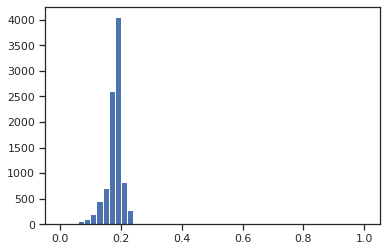

In [0]:
plt.hist(sc1_data, 50)
plt.show()

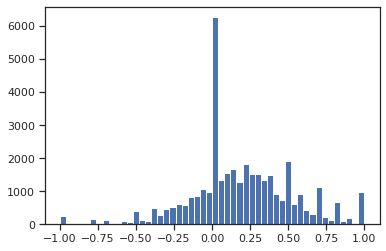

In [0]:
plt.hist(data1['Sentiment_Polarity'], 50)
plt.show()

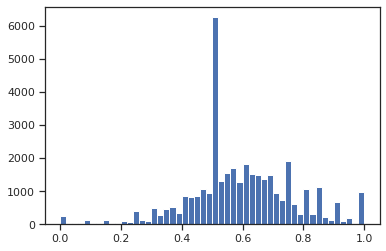

In [0]:
plt.hist(sc1_data1, 50)
plt.show()

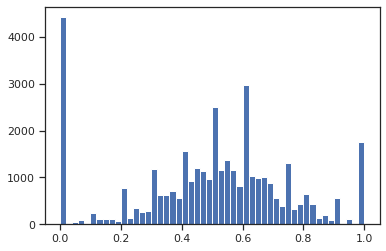

In [0]:
plt.hist(data1['Sentiment_Subjectivity'], 50)
plt.show()

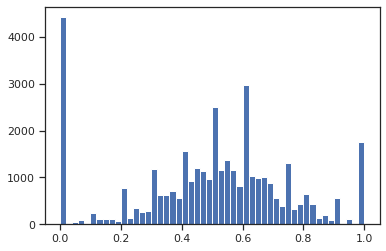

In [0]:
plt.hist(sc1_data11, 50)
plt.show()

### Z-оценка

In [0]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

In [0]:
sc21 = StandardScaler()
sc2_data1 = sc21.fit_transform(data1[['Sentiment_Polarity']])

In [0]:
sc211 = StandardScaler()
sc2_data11 = sc211.fit_transform(data1[['Sentiment_Subjectivity']])

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


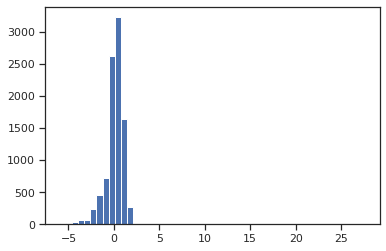

In [0]:
plt.hist(sc2_data, 50)
plt.show()

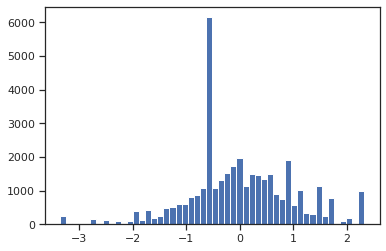

In [0]:
plt.hist(sc2_data1, 50)
plt.show()

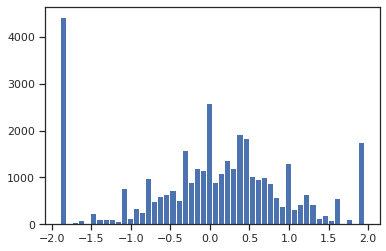

In [0]:
plt.hist(sc2_data, 50)
plt.show()

### Нормализация

In [0]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data_new_2[['Rating']])

In [0]:
sc31 = StandardScaler()
sc3_data1 = sc31.fit_transform(data1[['Sentiment_Polarity']])

In [0]:
sc311 = StandardScaler()
sc3_data11 = sc311.fit_transform(data1[['Sentiment_Subjectivity']])

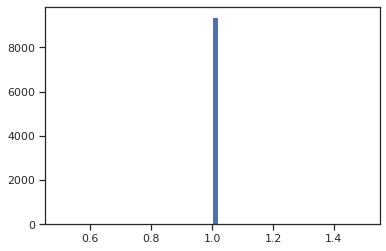

In [0]:
plt.hist(sc3_data, 50)
plt.show()

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


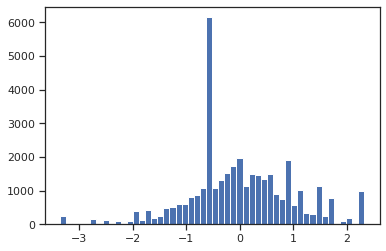

In [0]:
plt.hist(sc3_data1, 50)
plt.show()

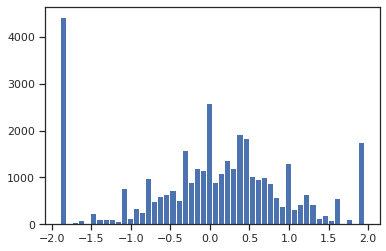

In [0]:
plt.hist(sc3_data11, 50)
plt.show()

## Вывод:
    В процессе выполнения данной работы были изучены методы обработки пропусков в данных, кодирования категориальных признаков и масштабирования данных.